
# TMDb-Movies Dataset Investigation
>### __By: Jeremiah Tindana__

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This project the details the cleaning, exploration and deduction of a data set from __The Movie Database(Tmdb)__.The data set holds the data concerning 10,000 different movies, along with their user ratings and revenue generated from said movies. The data set is characterized by 21 columns, each holding data on varying characteristics of each movie. The movie title, starring cast, movie director,revenue, runtime, release date and release year are captured.

>Per the data set, each movie has its unique ID captured in the __'id'__ columns, and an ID from imdb captured in the __'imdb_id'__ column. 

>The __'popularity'__ column describes the popularity rating of the movies. 

>The __'budget'__ column captures values equivalent to the monetary value of the resources spent in the creation of the movies. This feature could analysed to ascertain a relationship between  the success of a movie and the movie budget.

>The __'tagline'__, __'keywords'__ and __'overview'__ columns contain brief descriptions of the movie. The tagline captures a single catch phrase that best describes the movie, while the overview contains a paragraph of summary of the movie. __'keywords'__ hold a list of words that describe dominant features in the movies. Keywords can be used to describe the genre of each movie. For example, a movie about a monster ravaging a city could have a keyword, 'monster'.   

>__'runtime'__ holds numeric values equivalent to the length of each movie in minutes. This feature could play an interesting role in the success of a movie. Do movies with shorter runtimes have higher ratings?

>__'genres'__ holds a set of genres that the movie falls in. This column is simialar in structure to the __'keywords'__ column.

>__'production_companies'__ holds details on the names of the production companies that cooperated to produce the movie. 

>__'release_date'__ and __'release_year'__ hold the dates of release and year of release of each movie. 

>Movie patronizers were asked to rate the movies. __'vote_count'__ holds the number of patronizers who cast votes. They were asked to rate the movies with scores from 1 to 10, where 10 is the highest score, and 1 is the least score. __'vote_average'__ holds the mean rating of each movie. 

>The final two columns __'budget_adj'__ and __'revenue_adj'__ show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
>The data set in this case study has the prospects to answer a plethora of questions. In this investigation however, we will be limiting ourselves to 3 questions built upon 2 dependent (**popularity** and **revenue**) variables and 3 independent variables (**budget, runtime, and genre**).
>**Questions**:
>1. What is the relationship between the budget of a particular movie and its popularity?
>2. How does the popularity of a movie affect its revenue?
>3. Have more movies been made over the years? Do older movies have higher equivalent revenue than newer ones?

In [1]:
# To begin, we import are necessary functions, i.e., pandas, numpy, and matplotlib.
# We include the matplotlib inline to ensure that our graphs appear in our notebook workspace

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> In this section, we will take a look at our data and prepare it for analysis. We will scan through the data, carry out some data cleaning where necessary, and trim our data to suit the  objectives of this work.




In [3]:
# # Here, we load our data into this notebook and perform operations to inspect the data. 
# We shall acheive this by printing out a few lines of the data and performing a few 
# exploratory operations.
df = pd.read_csv('tmdb-movies.csv')

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Let us inspect the data set
df.shape

(10866, 21)

With the **df.shape** command, we see the shape of the data frame. The tuple generated from this command shows us the number of rows and columns of our data set. This data set has 10866 rows and 21 columns, indicating that there are, or should be 10866 entries. 

In [6]:
# Let us take a dive into certain statistics about our data 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**df.describe()** presents some statistics about our data. We see our mean, minimum and maximum values. 
**Popularity:** About 71%, 38%, and 21% of our entries are in the 75th, 50th, and 25th popularity percentile of our data. 
**Budget:** The maximum budget amount for the movies in our data set is 425 Million, and the minimum budget is 0. The average budget is 146.257 Million.
**Revenue:** The maximum revenue generated from any movie in our data set is about 2.78 Billion while the minimum is 0. The average revenue is about 40 Million.
**Runtime:** The average runtime for the movies in our data set is about 102 minutes. The longest and shortest movies have 900 minutes and 0 minutes respectively.

In [7]:
# Let us check for missing entries in our data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We see that from the results that certain features have missing data. **imdb_id**, **cast**, **homepage**, **director**, **tagline**, **keywords, **overview**, **genres**, and **production companies** have missing entries.  


### Data Cleaning
>We can see from the printout from **df.info()** that all data types appear to be in order, except for the **'release_date'** which should prefereably be in datetime form. However, the **'release_date'** column in this data is not a key feature as per the objectives of this exercise. For this reason only, we can either ignore or drop this column. All other columns that will play no important role in our analysis can be dropped as well to trim the data, leaving only the necessary features.
After dropping the unnecessary columns, the next step will be to handle the null data.

In [8]:
# Let's take a look at our data again to trim the rows we do not need.
df.head(0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [9]:
# We can delete the cast, homepage, director, tagline, overview, production companies and release date columns
# We acheive this with pandas' drop() function.
df.drop(['cast','homepage','director','tagline','overview','production_companies','release_date'],axis=1, inplace=True)

In [10]:
# Let's confirm the changes
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
# Oops! Let's drop the keyword column too. Also, we will not be using the 'budget_adj' column for our analysis
df.drop(['keywords','budget_adj'],axis=1, inplace=True)

In [12]:
# confirm changes. We can print only the headers
df.head(0)

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,revenue_adj


In [13]:
# Take a look at the new shape of the dataframe
df.shape

(10866, 12)

Now that our data frame is neatly trimmed, we have our number of columns reduced from 21 to 11. 
Next, let's handle null or missing data.

In [14]:
# Take a look at the rows with missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 1018.8+ KB


Only 2 features have missing values, i.e., 'imdb_id' and 'genres'. Since the **imdb_id** values are unique values assigned to each movie, replacing null values with the mean will not be of any benefit. The plausible option here would be to drop those rows. We do same for the **genres** column.

In [15]:
# Drop null rows using pandas' dropna. Confirm for changes
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 12 columns):
id                10835 non-null int64
imdb_id           10835 non-null object
popularity        10835 non-null float64
budget            10835 non-null int64
revenue           10835 non-null int64
original_title    10835 non-null object
runtime           10835 non-null int64
genres            10835 non-null object
vote_count        10835 non-null int64
vote_average      10835 non-null float64
release_year      10835 non-null int64
revenue_adj       10835 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 1.1+ MB


In [16]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.385749e+09


Our data seems to be in pretty good shape. Now, we can delve into our Exploratory Data Analysis.
But before that, let's plot some graphical representations of our data just to have an overview of the current state.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10d892d5f8>,
      dtype=object)

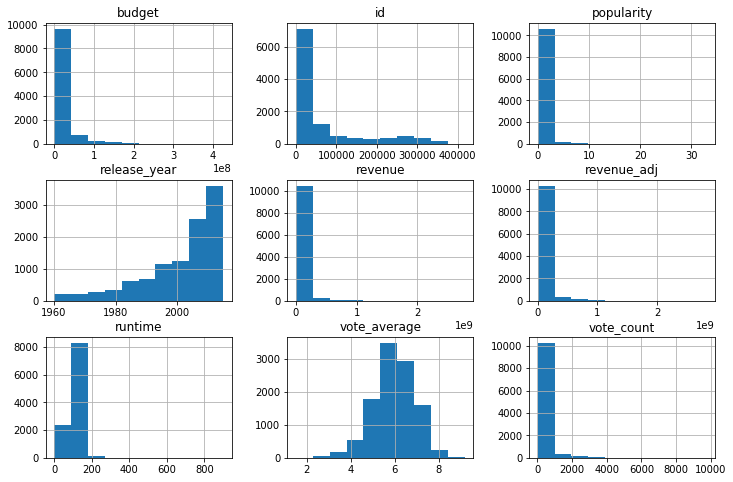

In [17]:
# We'll plot histograms to study our distributions
df.hist(figsize =(12,8))

### Interpreting the Graphs
The graph give us some comfort that our analysis have so far been on the right path. Our graphs make a lot of sense, and we see no severe deviations or abnormalities. Most of our graphs are skewed. The greater part of the movie budgets are less than 1 billion. The popularity of most of the movies is between 0 and 10. 
The graph for the release year is skewed to the left, indicating that most of the movies were release after the year 2000, and a number of them between 1960 and 2000.
The graph of revenues is very skewed to the right. Almost all our movies have revenues less than 500 Million.
Only a few movies have runtimes above 200 minutes.


<a id='eda'></a>
## Exploratory Data Analysis


### 1. What is the relationship between the budget of a particular movie and its popularity?
#### Dependent Variable - Popularity

First of all let us plot a scatter graph of **budget** and **popularity** to check for correlation. Since we will performing this task a number of times in our analysis, we need to make this task less cumbersome. We will acheive this by creating a function. 

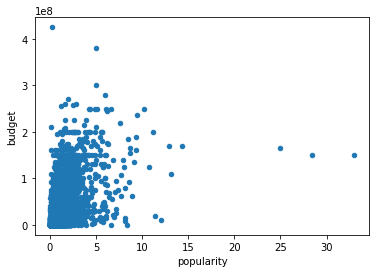

In [18]:
# Create a function to plot scatter graphs
def scatter_graph(arg):
    df.plot(x='popularity',y=arg,kind='scatter')
    
scatter_graph('budget')

Our scatter shows a level of positive correlation between budget and popularity.
We can explore this relationship even further.

In [19]:
# Let's take a look at our dependent variable
df.popularity.max(), df.popularity.median(), df.popularity.min()

(32.985763, 0.38461799999999996, 6.500000000000001e-05)

Our maximum, median and minimum popularity are as shown above. Let's look at our median popularity.

In [20]:
median = df.popularity.median()
median

0.38461799999999996

Let's see how many movies had popularity above the median popularity

In [21]:
popular = df.query('popularity>{}'.format(median))
unpopular = df.query('popularity<{}'.format(median))

In [22]:
# Let's find the mean for each group in relation to budget
mean_popular = popular['budget'].mean()
mean_unpopular = unpopular['budget'].mean()
mean_popular, mean_unpopular

(25892745.875392284, 3443115.780321211)

Now that we have our means, let us create a bar chart to visualize the relationships in our data.

Text(0,0.5,'Budget Amount')

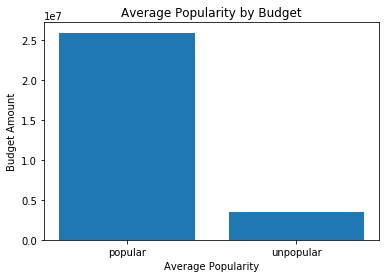

In [23]:
# Creating a bar chart
locations = [1,2]
heights = [mean_popular, mean_unpopular]
labels = ['popular','unpopular']
plt.bar(locations,heights,tick_label=labels)
plt.title('Average Popularity by Budget')
plt.xlabel('Average Popularity')
plt.ylabel('Budget Amount')

The bar chart provides more conclusive and substantial results. The most popular movies appear to have higher budget amounts that the unpopular movies. The budget of the movies whose mean popularity are above the median are greater than those whose popularity are below the median.

### 2. How does the popularity of a movie affect its revenue?
Like before, we shall begin by checking for correlation using a scatter plot

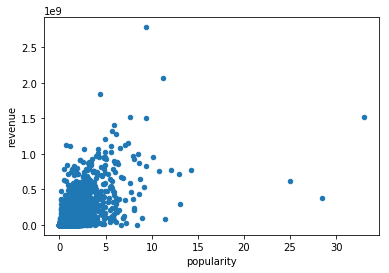

In [24]:
# Creating a scatter plot of revenue and popularity
scatter_graph('revenue')

It would make sense to assume that the most popular movies would have higher revenues. However, let's not be quick to assume. The scatter graph shows some positive correlation. We can go further to get more ascertive results.

In [25]:
# Take a look at some descriptive statistics of our revenue data
df.revenue.describe()

count    1.083500e+04
mean     3.993726e+07
std      1.171513e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.417286e+07
max      2.781506e+09
Name: revenue, dtype: float64

The mean revenue is 39937260 (about 40 Million)

In [26]:
mean_rev = df.revenue.mean()

We can go ahead to divide the revenue set into different levels. We can create a new column called **revenue_level** and place in there the level of revenue generated, either **'high'** or **'low'**. The low and high categories will created with regards to the mean.

In [27]:
# We use a for loop to create our new column in the data frame
revenue_level = []
for value in df['revenue']:
    if value >= mean_rev:
        revenue_level.append('high')
    else:
        revenue_level.append('low')
      
df['revenue_level'] = revenue_level  

# We need to check if our changes have taken effect
df.revenue_level

0        high
1        high
2        high
3        high
4        high
         ... 
10861     low
10862     low
10863     low
10864     low
10865     low
Name: revenue_level, Length: 10835, dtype: object

Since our changes have taken effect, we can proceed.

In [28]:
# Let's proceed to fish out our two groups 
high_rev = df[df['revenue'] >=mean_rev]
low_rev = df[df['revenue'] <mean_rev]

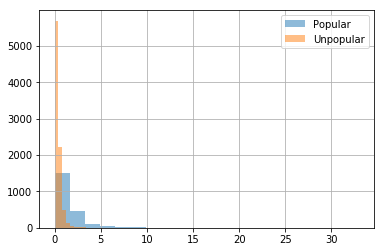

In [29]:
high_rev['popularity'].hist(alpha=0.5,bins=20,label='Popular')
low_rev['popularity'].hist(alpha=0.5,bins=20,label='Unpopular')
plt.legend()

Look at that! Our data does not agree with the initial assumption! Looking at our double plot, we can see that on the average, per our data set, the unpopular movies seem to have a higher average revenue that the popular ones. That is surprising isn't it? Well it can be explained. In the two new data sets we created, **high_rev** and **low_rev**, we see that our criteria for splitting the data wasn't the most appropriate. That is because our data is skewed, and most of the entries in the data set are on the low side. This would mean that even if the popular ones have higher revenues, the overwhelming number of unpopular ones would cause inaccurate results. A solution to this would be to create more than 2 groups, to ensure that the data is split somewhat evenly. 

### 3. Have more movies been made over the years? Do older movies have higher equivalent revenue than newer ones?
With this question, we want to compare the years in our movie data by checking their revenues. We must take note however that the value of money changes from year to year. Luckily we have the revenue_adj column which is the monetary equivalent in 2010 for all the years. 

In [30]:
# Let's view our data again
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,revenue_adj,revenue_level
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.392446e+09,high
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,3.481613e+08,high


In [31]:
# Let's explore our release_year column
df.release_year.describe()

count    10835.000000
mean      2001.308999
std         12.815519
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

So the least year of release captured in our data is 1960, and the latest year is 2015. 
Let's look at the unique years in our data set.

In [32]:
# we will use the unique function
df['release_year'].nunique()

56

To break the data down into years, we can look at the amount of data in each year. We will use the value_counts() function

In [33]:
df['release_year'].value_counts()

2014    699
2013    655
2015    626
2012    583
2011    540
2009    529
2008    495
2010    487
2007    436
2006    408
2005    363
2004    307
2003    281
2002    266
2001    241
2000    226
1999    224
1998    210
1996    203
1997    192
1994    184
1993    178
1995    174
1988    145
1989    136
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1976     47
1974     46
1966     46
1975     44
1964     42
1970     40
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

Here, we can see that the movies across the years from 1961 forward keep increasing. Let's plot a histogram to visualize this trend.

(array([ 206.,  196.,  287.,  339.,  621.,  679., 1141., 1238., 2538.,
        3590.]),
 array([1960. , 1965.5, 1971. , 1976.5, 1982. , 1987.5, 1993. , 1998.5,
        2004. , 2009.5, 2015. ]),
 <a list of 10 Patch objects>)

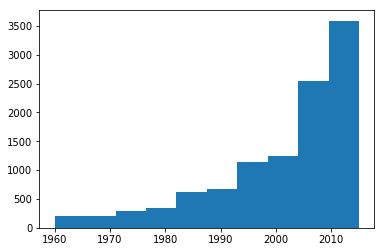

In [34]:
plt.hist(df['release_year'])

Skewed data! Our graph of release years is skewed to the left. This proves that as the years went by, more and more movies were produced. The movie industry has grown largely over the decades. But by how much? 

In [35]:
# Find the percentage increase between 1961 and 2014. Select data from release year value counts
mov_1961 = 31
mov_2014 = 699
perc_inc = (mov_2014 / mov_1961) * 100
perc_inc

2254.838709677419

The movie industry has grown by over 2000%!

Now let's take a look at the relationship between revenue_adj and the movies across the years 

Text(0,0.5,'Year')

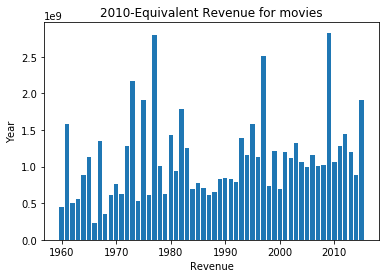

In [36]:
plt.bar(df['release_year'],df['revenue_adj'])
plt.title('2010-Equivalent Revenue for movies')
plt.xlabel('Revenue')
plt.ylabel('Year')

No conclusive results can be drawn from the graph. Converting all revenue values from all years to equivalent values of money, each year had its revenue independent. The revenue generated from movies depends on some other factors, but not the year.

<a id='conclusions'></a>
## Conclusions

>1. What is the relationship between the budget of a particular movie and its popularity?
>>Movies with higher budgets tend to end up with more popularity than those with low budgets.
>2. How does the popularity of a movie affect its revenue?
>>The group of unpopular movies seem to have a higher average revenue that the popular ones.
>3. Have more movies been made over the years? Do older movies have higher equivalent revenue than newer ones?
>>The movie industry has grown by over 2000%!
>>Older movies did not appear to have more or less equivalent revenue than the new ones. 
## Limitations 

>1. In the two new data sets created in the second analysis, high_rev and low_rev, we see that our criteria for splitting the data wasn't the most appropriate. That is because our data is skewed, and most of the entries in the data set are on the low side. This would mean that even if the popular ones have higher revenues, the overwhelming number of unpopular ones would cause inaccurate results. A solution to this would be to create more than 2 groups, to ensure that the data is split almost evenly.
>2. The same can be said about the popular and unpopular data sets in the first analysis.


In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0